![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #01 | Machine Learning & Linear Regression

## Machine Learning, what does it mean?

In [1]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

## How does the Machine Learn?

### In a Linear Regression

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ht3rYS-JilE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### In a Neural Network

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?t=322" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

![](src/ai-ml-dl.png)

## How do we compute a Linear Regression Model in Python?

- As always, we need to use a function

Where is the function?

- It should be in a library

Which is the Python library for Machine Learning?

- sklearn

### Import the Class

How can we access the function to compute a Linear Regression model?

- We need to import the `LinearRegression` class within `linear_model` module

In [4]:
from sklearn.linear_model import LinearRegression

### Instantiante the Class

- Now we instantiate (create a copy) from the class (the blueprint of a modular house)

In [5]:
model_lr = LinearRegression()

![](../src/blueprint-house.jpeg)

In this way, we have an **stored object** in memory that can apply the functions we need to **calculate the coefficients (numbers)** of the mathematical equation.

Let's take a look at the stored information within the object and we won't see any number because we haven't yet applied the function that computes the coefficients:

In [6]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

### Access the Function

Which is the funtion that applies the Linear Regression **algorithm** in which the **squared errors are minimised**?

- `.fit()`

In [7]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

Why is it asking for two parameters: `X` and `y`?

- They are:
    - `X`: explanatory ~ dependent ~ feature variables
    - `y`: target ~ independent ~ label ~ class variable`X`

## Data for Exemplification

Let's load some data to learn with a practical example:

- Simply execute the following lines of code to load the data
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [8]:
import seaborn as sns #!
import pandas as pd

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'total']]
df_crashes.rename({'total': 'accidents'}, axis=1, inplace=True)
df_crashes

,alcohol,accidents
abbrev,,
AL,5.640,18.8
AK,4.525,18.1
...,...,...
WI,4.554,13.8
WY,5.568,17.4


## Separate the Variables

In [9]:
explanatory = df_crashes[['alcohol']]

In [10]:
target = df_crashes['accidents']

## Small Recap

Remember we had to:
    
1. Import the Class

In [11]:
from sklearn.linear_model import LinearRegression

2. Create the instance with the Class

In [12]:
model_lr = LinearRegression()

In [13]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

3. Access the function

In [14]:
model_lr.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

## The Linear Regression Model

### Compute the Mathematical Equation

In [15]:
model_lr.fit(X=explanatory, y=target)

LinearRegression()

### Model Interpretation

In [16]:
model_lr.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['alcohol'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([2.0325063]),
 '_residues': 231.9688865331006,
 'rank_': 1,
 'singular_': array([12.22681605]),
 'intercept_': 5.857776154826299}

$$
accidents = (a) + (b) \cdot alcohol \\
accidents = (5.857) + (2.032) \cdot alcohol
$$

For every unit of alcohol increased, the number of accidents will increase 2.03 units.

### Calculate Predictions

In [17]:
explanatory.head(5)

,alcohol
abbrev,
AL,5.640
AK,4.525
AZ,5.208
AR,5.824
CA,3.360


In [18]:
model_lr.predict(X=explanatory)[:5]

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734])

In [19]:
df_crashes['pred_lr'] = model_lr.predict(X=explanatory)

In [20]:
df_crashes

,alcohol,accidents,pred_lr
abbrev,,,
AL,5.640,18.8,17.321112
AK,4.525,18.1,15.054867
...,...,...,...
WI,4.554,13.8,15.113810
WY,5.568,17.4,17.174771


$$
accidents = (a) + (b) \cdot alcohol \\
accidents = (5.85) + (2.03) \cdot alcohol
$$

In [21]:
(5.857) + (2.032) * 5.64

17.31748

In [22]:
(5.857) + (2.032) * 4.525

15.0518

### Model Visualization

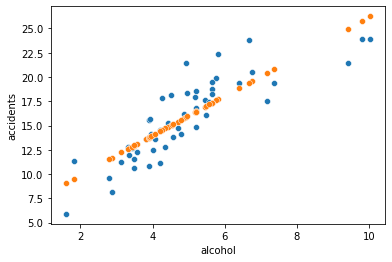

In [23]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);

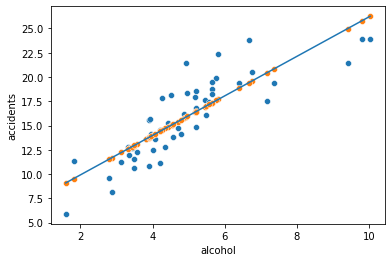

In [24]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);
sns.lineplot(x='alcohol', y='pred_lr', data=df_crashes);

### Model's Score

In [25]:
model_lr.score(X=explanatory, y=target)

0.7269492966665405

### Model's Score Explanation

In [26]:
df_crashes['accidents'] - df_crashes['pred_lr']

abbrev
AL    1.478888
AK    3.045133
        ...   
WI   -1.313810
WY    0.225229
Length: 51, dtype: float64

In [27]:
df_crashes['residuals'] = df_crashes['accidents'] - df_crashes['pred_lr']

In [28]:
df_crashes

,alcohol,accidents,pred_lr,residuals
abbrev,,,,
AL,5.640,18.8,17.321112,1.478888
AK,4.525,18.1,15.054867,3.045133
...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810
WY,5.568,17.4,17.174771,0.225229


In [29]:
df_crashes.residuals.sum()

1.4033219031261979e-13

In [30]:
df_crashes.residuals.sum().round(2)

0.0

In [31]:
df_crashes['residuals^2'] = df_crashes.residuals**2

In [32]:
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals^2
abbrev,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111
AK,4.525,18.1,15.054867,3.045133,9.272834
...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096
WY,5.568,17.4,17.174771,0.225229,0.050728


In [33]:
df_crashes['residuals^2'].sum()

231.96888653310063

The model was made to predict the number of accidents.

We should ask: how good are the variation of the model's predictions compared to the variation of the real data (real number of accidents)?

We have already calculated the variation of the model's prediction. Now we calculate the variation of the real data:

In [34]:
df_crashes.accidents

abbrev
AL    18.8
AK    18.1
      ... 
WI    13.8
WY    17.4
Name: accidents, Length: 51, dtype: float64

In [35]:
df_crashes.accidents.mean()

15.79019607843137

$$
x_i - \bar x
$$

where x is the number of accidents

In [36]:
df_crashes.accidents - df_crashes.accidents.mean()

abbrev
AL    3.009804
AK    2.309804
        ...   
WI   -1.990196
WY    1.609804
Name: accidents, Length: 51, dtype: float64

In [37]:
df_crashes['real_residuals'] = df_crashes.accidents - df_crashes.accidents.mean()

In [38]:
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals^2,real_residuals
abbrev,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,3.009804
AK,4.525,18.1,15.054867,3.045133,9.272834,2.309804
...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,-1.990196
WY,5.568,17.4,17.174771,0.225229,0.050728,1.609804


In [39]:
df_crashes['real_residuals^2'] = df_crashes.real_residuals**2

$$
TTS = \sum(y_i - \bar y)^2
$$

where
- y_i is the number of accidents
- $\bar y$ is the average number of accidents
- TTS: Total Sum of Squares

In [40]:
df_crashes['real_residuals^2'].sum()

849.5450980392156

In [41]:
TSS = df_crashes['real_residuals^2'].sum()

$$
RSS = \sum(y_i - \hat{y})^2
$$

where
- y_i is the real number of accidents
- $\hat y$ is the predicted number of accidents
- RSS: Residual Sum of Squares

In [42]:
df_crashes['residuals^2'].sum()

231.96888653310063

In [43]:
RSS = df_crashes['residuals^2'].sum()

In [44]:
RSS/TSS

0.2730507033334595

0.27 is the badness of the model as **RSS** represents the **residuals** (errors) of the model.

To calculate the **goodness** of the model, we need to substract the ratio RSS/TSS to 1:

$$
R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum(y_i - \hat{y})^2}{\sum(y_i - \bar y)^2}
$$

- [ ] graphical explanation of the R^2

In [45]:
1 - RSS/TSS

0.7269492966665405

The model is able to explain 72.69% of the total number of accidents variability.

## Recap

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model_lr = LinearRegression()

In [48]:
model_lr.fit(X=explanatory, y=target)

LinearRegression()

In [49]:
df_crashes['pred_lr'] = model_lr.predict(X=explanatory)

In [50]:
df_crashes

,alcohol,accidents,pred_lr,residuals,residuals^2,real_residuals,real_residuals^2
abbrev,,,,,,,
AL,5.640,18.8,17.321112,1.478888,2.187111,3.009804,9.058920
AK,4.525,18.1,15.054867,3.045133,9.272834,2.309804,5.335194
...,...,...,...,...,...,...,...
WI,4.554,13.8,15.113810,-1.313810,1.726096,-1.990196,3.960880
WY,5.568,17.4,17.174771,0.225229,0.050728,1.609804,2.591469


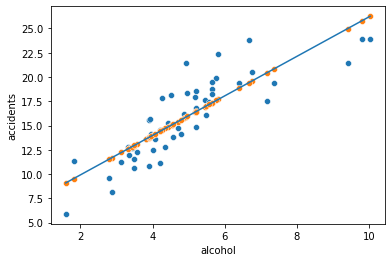

In [51]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes)
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes);
sns.lineplot(x='alcohol', y='pred_lr', data=df_crashes);

In [52]:
model_lr.score(X=explanatory, y=target)

0.7269492966665405

## Other Models

https://blog.resolvingpython.com/why-all-machine-learning-models-are-the-same

### `RandomForestRegressor()` in Python

#### Fit the Model

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model_rf = RandomForestRegressor()

In [55]:
model_rf.fit(X=explanatory, y=target)

RandomForestRegressor()

#### Calculate Predictions

In [56]:
model_rf.predict(X=explanatory)

array([18.691 , 16.928 , 17.4742, 21.098 , 12.247 , 13.326 , 12.684 ,
       16.87  ,  7.072 , 17.7489, 14.316 , 18.207 , 14.882 , 14.349 ,
       13.85  , 15.179 , 15.845 , 19.7422, 21.37  , 15.788 , 13.108 ,
        8.88  , 14.541 ,  9.398 , 17.281 , 16.651 , 22.009 , 15.8685,
       14.473 , 11.577 , 11.406 , 18.6322, 11.923 , 17.4742, 23.234 ,
       14.89  , 20.198 , 12.5   , 18.499 , 12.422 , 23.234 , 20.529 ,
       19.008 , 19.024 ,  9.772 , 13.381 , 12.379 , 11.127 , 22.822 ,
       14.533 , 17.875 ])

In [57]:
df_crashes['pred_rf'] = model_rf.predict(X=explanatory)

#### Model's Score

In [58]:
model_rf.score(X=explanatory, y=target)

0.9572820130399662

### `SVR()` in Python

#### Fit the Model

In [59]:
from sklearn.svm import SVR

In [60]:
model_sv = SVR()

In [61]:
model_sv.fit(X=explanatory, y=target)

SVR()

#### Calculate Predictions

In [62]:
model_sv.predict(X=explanatory)

array([18.29570777, 15.18462721, 17.2224187 , 18.6633175 , 12.12434781,
       13.10691581, 13.31612684, 16.21131216, 12.66062465, 17.17537208,
       13.34820949, 19.38920329, 14.91415215, 14.65467023, 14.2131504 ,
       13.41560202, 14.41299448, 16.39752499, 19.4896662 , 15.20002787,
       13.62200798, 11.5390483 , 13.47824339, 11.49818909, 17.87053595,
       17.9144274 , 19.60736085, 17.24170425, 15.73585463, 12.35136579,
       11.784815  , 16.53431108, 12.53373232, 17.2224187 , 19.4773929 ,
       16.01115736, 18.56379706, 12.06891287, 18.30002795, 14.25171609,
       19.59597679, 19.37950461, 18.32794218, 19.29994413, 12.26345665,
       13.84847453, 12.25128025, 12.38791686, 19.48212198, 15.27397732,
       18.1357253 ])

In [63]:
df_crashes['pred_sv'] = model_sv.predict(X=explanatory)

#### Model's Score

In [64]:
model_sv.score(X=explanatory, y=target)

0.7083438012012769

## Visualize the 3 Models

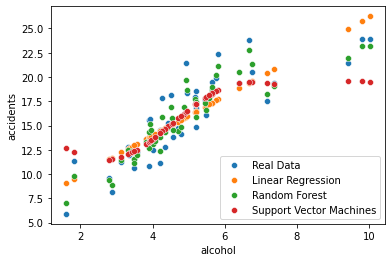

In [65]:
sns.scatterplot(x='alcohol', y='accidents', data=df_crashes, label='Real Data')
sns.scatterplot(x='alcohol', y='pred_lr', data=df_crashes, label='Linear Regression')
sns.scatterplot(x='alcohol', y='pred_rf', data=df_crashes, label='Random Forest')
sns.scatterplot(x='alcohol', y='pred_sv', data=df_crashes, label='Support Vector Machines');

## Which One Is the Best? Why?

The Random Forest is the nearest to the real data.

In addition, it has a higher score than the rest:

In [66]:
model_rf.score(X=explanatory, y=target)

0.9572820130399662

In [67]:
model_sv.score(X=explanatory, y=target)

0.7083438012012769

In [68]:
model_lr.score(X=explanatory, y=target)

0.7269492966665405

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.